# Pandas's basic data structure: Series, DataFrame

In [4]:
import pandas as pd
import numpy as np

In [114]:
num = 10
s = pd.Series(np.random.randn(num),index = pd.date_range('20180819',periods=num))
col_title = ('A','B','C','D','E')
df = pd.DataFrame(np.random.randint(0,10,(4,5)),columns=col_title)
s

2018-08-19   -1.227220
2018-08-20   -3.043076
2018-08-21    0.296055
2018-08-22    0.862989
2018-08-23    1.171779
2018-08-24    0.501999
2018-08-25    2.395130
2018-08-26    0.460285
2018-08-27   -1.435532
2018-08-28    2.143784
Freq: D, dtype: float64

In [76]:
print(df.shape)
print(df.size)
print(df.values)
print(df.tail(1))
print(df.index)
print(df.columns)

(4, 5)
20
[[1 3 1 7 7]
 [1 4 4 7 8]
 [5 3 6 7 2]
 [3 6 3 1 6]]
   A  B  C  D  E
3  3  6  3  1  6
RangeIndex(start=0, stop=4, step=1)
Index(['A', 'B', 'C', 'D', 'E'], dtype='object')


In [77]:
df.describe()

,A,B,C,D,E
count,4.000000,4.000000,4.000000,4.0,4.000000
mean,2.500000,4.000000,3.500000,5.5,5.750000
std,1.914854,1.414214,2.081666,3.0,2.629956
min,1.000000,3.000000,1.000000,1.0,2.000000
25%,1.000000,3.000000,2.500000,5.5,5.000000
50%,2.000000,3.500000,3.500000,7.0,6.500000
75%,3.500000,4.500000,4.500000,7.0,7.250000
max,5.000000,6.000000,6.000000,7.0,8.000000


In [82]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D,E
3,3,6,3,1,6
2,5,3,6,7,2
1,1,4,4,7,8
0,1,3,1,7,7


In [86]:
df.sort_values(by='E',ascending=False)

,A,B,C,D,E
1,1,4,4,7,8
0,1,3,1,7,7
3,3,6,3,1,6
2,5,3,6,7,2


In [101]:
df[df.C>2]

,A,B,C,D,E,Tag
1,1,4,4,7,8,b
2,5,3,6,7,2,c
3,3,6,3,1,6,d


In [92]:
df['Tag'] = ['a','b','c','d']

In [110]:
aa=df.groupby('Tag').sum()
aa

,A,B,C,D,E
Tag,,,,,
a,1,3,1,7,7
b,1,4,4,7,8
c,5,3,6,7,2
d,3,6,3,1,6


# Time series processing

In [166]:
num = 366
ts = pd.Series(np.random.randn(num),index=pd.date_range('20180819',periods=num,freq='1h'))
print(ts.shape)

(366,)


In [167]:
ts.head(15)

2018-08-19 00:00:00   -0.587327
2018-08-19 01:00:00    0.884945
2018-08-19 02:00:00    0.745905
2018-08-19 03:00:00   -1.176909
2018-08-19 04:00:00    0.615017
2018-08-19 05:00:00   -0.731108
2018-08-19 06:00:00    0.405734
2018-08-19 07:00:00    0.631376
2018-08-19 08:00:00   -0.650707
2018-08-19 09:00:00   -0.341569
2018-08-19 10:00:00   -0.494901
2018-08-19 11:00:00   -0.681790
2018-08-19 12:00:00    0.303120
2018-08-19 13:00:00   -0.138617
2018-08-19 14:00:00   -0.204414
Freq: H, dtype: float64

In [168]:
import matplotlib.pyplot as plt

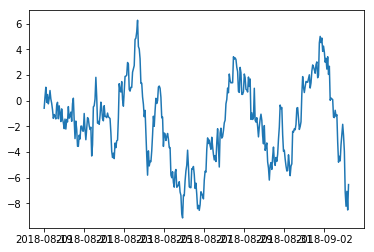

In [183]:
cs = ts.cumsum()
plt.plot(cs)
plt.show()

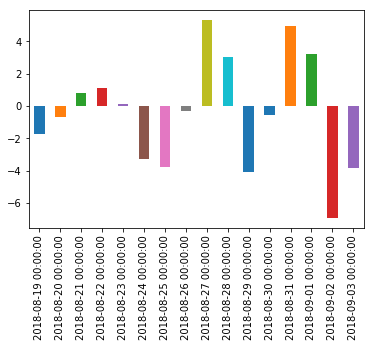

In [174]:
ts.resample("1d").sum().plot.bar()

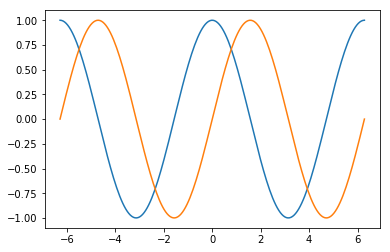

In [190]:
%matplotlib inline
x = np.linspace(-2*np.pi,2*np.pi,200)
c = np.cos(x)
s = np.sin(x)

plt.plot(x,c)
plt.plot(x,s)
plt.show()

## setting style

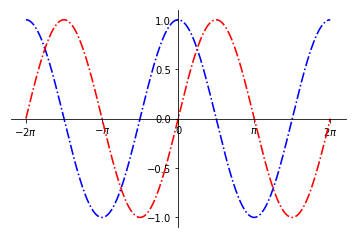

In [246]:
plt.plot(x,c,color="b",linewidth=1.6,linestyle="-.")
plt.plot(x,s,color="r",linewidth=1.6,linestyle="-.")
plt.xlim(x.min()*1.1,x.max()*1.1)
plt.ylim(c.min()*1.1,c.max()*1.1)
plt.xticks((-2*np.pi,-np.pi,0,np.pi,2*np.pi),(r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'))
plt.yticks((-1,-0.5,0,0.5,1))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))



plt.show()

## There're also many other verbose and sophisticated skills to implement a fabulous chart. However, mere reading the textbook and type the code won't make you familiar with them. According to the experience gained from learning matlab ploting, the best way is to march on with questions, practising along the journey.